# Session 5: Neural Mass Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

## About this tutorial
In this tutorial, you will play around with the neural mass models covered in lecture 5: the Wilson-Cowan model, the Kuramoto oscillator model and the  Hopfield network.



## Wilson-Cowan model

The Wilson–Cowan model describes the dynamics of interactions between populations of simple excitatory and inhibitory neurons. Specifically, it consits of two coupled differential equations that describe the time evolution of the proportion of active neurons in the excitatory $(E)$ and inhibitory $(I)$ populations. Here we will use the equations presented below which ever so slightly differ from those in the lecture.

$$
\begin{array}{}
\tau_e \dot E &= -E + \left( k_e - rE \right) &\sigma \left( w_{ee} E - w_{ei} I +P_e \right) \\
\tau_i \dot I &= -I + \left( k_i - rI \right) &\sigma \left( w_{ie} E - w_{ii} I +P_i \right)
\end{array}.
$$

In these equations, $\tau_e$ $(\tau_i)$ is the time constant of the excitatory (inhibitory) population, $k_e$ $(k_i)$  is the maximum response of the excitatory (inhibitory) population, $r$ is the refractory period, $w_{ab}$ are weights between populations $a$ and $b$, $P_e$ $(P_i)$ is the external input to the excitatory (inhibitory) populations and $\sigma(\cdot)$ is a sigmoidal activation function:

$$
\sigma(x) = \frac{1}{1+e^{-\alpha (x-\theta)}}
$$

where $\alpha$ controls the maximum slope and $\theta$ controls the location of the inflection point.

### Phase-plane analysis

Perform a phase-plane analysis of the Wilson-Cowan system using the following parameter values.

| Parameter|Value|Description|
|:---|:---|---|
|$r$| $1$|refractory period|
|$k_e$| $0.97$|maximum response of excitatory population|
|$k_i$| $0.98$|maximum response of inhibitory population|
|$\tau_e$| $1$|time constant excitatory population|
|$\tau_i$| $1$|time constant inhibitory population|
|$w_{ee}$| $12$| weight between excitatory neurons|
|$w_{ei}$| $4$| synaptic weight from inhibitory to excitatory population|
|$w_{ie}$| $13$| synaptic weight from excitatory to inhibitory population|
|$w_{ii}$| $11$| synaptic weight between inhibitory neurons|
|$P_{e}$| $0$| input to excitatory population|
|$P_{i}$| $0$| input to inhibitory population|
|$\alpha_{e}$| $1.2$| slope excitatory population|
|$\alpha_{i}$| $1$| slope inhibitory population|
|$\theta_{e}$| $2.8$| location of inflection point excitatory population|
|$\theta_{i}$| $4$| location of inflection point inhibitory population|

**Task 1**: Obtain the inverse of the sigmoid function $\sigma^{-1}( \cdot)$

\begin{align}
&y = \frac{1}{1+e^{-\alpha(x-\theta)}}\\
&\Leftrightarrow \frac{1}{y} = 1+e^{-\alpha(x-\theta)}\\
&\Leftrightarrow \frac{1}{y} - 1 = e^{-\alpha(x-\theta)}\\
&\Leftrightarrow \ln({\frac{1}{y} - 1}) = \ln({e^{-\alpha(x-\theta)}})\\
&\Leftrightarrow \ln({\frac{1}{y} - 1}) = -\alpha(x-\theta)\\
&\Leftrightarrow \frac{\ln({\frac{1}{y} - 1})}{-\alpha} + \theta = x\\
&\Leftrightarrow \frac{\ln({\frac{1-y}{y}})}{-\alpha} + \theta = x\\
&\Leftrightarrow \frac{\ln(1-y)-\ln(y)}{-\alpha} + \theta = x\\
\end{align}


**Task 2**: Obtain the Nullclines for $\dot E$ and $\dot I$. Note that it is easier to solve $\dot E = 0$ for $I$ than for $E$. Similarly, it is easier to solve $\dot I = 0$ for $E$ than for $I$.

$$
\begin{array}{}
\tau_e \dot E &= -E + \left( k_e - rE \right) &\sigma \left( w_{ee} E - w_{ei} I +P_e \right) \\
\tau_i \dot I &= -I + \left( k_i - rI \right) &\sigma \left( w_{ie} E - w_{ii} I +P_i \right)
\end{array}.
$$

We want:
\begin{align}
&\dot E = 0\\
&\dot I = 0
\end{align}
Solve $\dot E = 0$ for $I$
\begin{align}
&\dot E = 0\\
\Leftrightarrow &0 = -E + (k_e - rE) \sigma (w_{ee} E - w_{ei} I + P_e) \quad| + E\\
\Leftrightarrow &E = (k_e - rE) \sigma (w_{ee} E - w_{ei} I + P_e) \quad| :(k_e - rE)\\
\Leftrightarrow &\frac{E}{k_e - rE} = \sigma (w_{ee} E - w_{ei} I + P_e) \quad| \sigma^{-1}\\
\Leftrightarrow &\sigma^{-1} (\frac{E}{k_e - rE}) = w_{ee} E - w_{ei} I + P_e \quad| + w_{ei} I - \sigma^{-1} (\frac{E}{k_e - rE}) \\
\Leftrightarrow & w_{ei} I = w_{ee} E + P_e - \sigma^{-1} (\frac{E}{k_e - rE}) \quad | : w_{ei}\\
\Leftrightarrow & I = \frac{w_{ee} E + P_e - \sigma^{-1} (\frac{E}{k_e - rE})}{w_{ei}}\\
\end{align}

Same for $\dot I = 0$ solving for E

\begin{align}
E = \frac{w_{ii} I - P_i + \sigma^{-1} (\frac{I}{k_i - rI})}{w_{ie}}
\end{align}

**Task 3**: Draw a phase portrait of the Wilson-Cowan model.



/tmp/ipykernel_129/2366335629.py:17: RuntimeWarning: divide by zero encountered in divide
  sigma_inv = lambda x, alpha, theta: -np.log(1 / x - 1) / alpha + theta
/tmp/ipykernel_129/2366335629.py:17: RuntimeWarning: invalid value encountered in log
  sigma_inv = lambda x, alpha, theta: -np.log(1 / x - 1) / alpha + theta


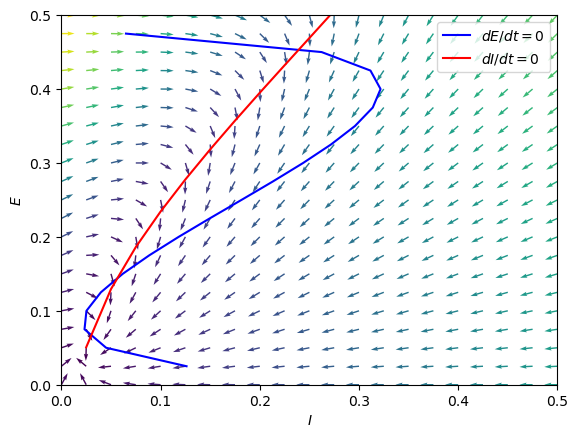

In [10]:
r = 1
ke = 0.97
ki = 0.98
wee = 12
wei = 4
wie = 13
wii = 11

Pe = 0
Pi = 0
alpha_e =1.2
alpha_i = 1
theta_e = 2.8
theta_i = 4
     
sigma = lambda x, alpha, theta: 1 / (1 + np.exp( -alpha * (x - theta) ))
sigma_inv = lambda x, alpha, theta: -np.log(1 / x - 1) / alpha + theta
              
EI_vals = np.linspace(0, 0.5, 21)
I, E = np.meshgrid(EI_vals, EI_vals)
E = np.flip(E, axis=0)

## compute gradient for vector field
dE_function = lambda I, E: -E + (ke - r*E) * sigma(wee*E - wie*I + Pe, alpha_e, theta_e)
dI_function = lambda I, E: -I + (ki - r*I) * sigma(wie*E - wii*I + Pi, alpha_i, theta_i)

dE = dE_function(I, E)
dI = dI_function(I, E)

## compute Nullclines
### intersections of Nullclines are fix points
I_Nullcline_function = lambda E: 1/wei * (wee*E + Pe - sigma_inv(E/(ke-r*E), alpha_e, theta_e))
E_Nullcline_function = lambda I: 1/wie * (wii*I + Pi + sigma_inv(I/(ki-r*I), alpha_i, theta_i))

i = I_Nullcline_function(EI_vals)
e = E_Nullcline_function(EI_vals)

## plotting
magnitude = np.sqrt(dE**2 + dI**2)
plt.quiver(I, E, dI / magnitude, dE / magnitude, magnitude)
plt.plot(i, EI_vals, 'b', label='$dE/dt = 0$')
plt.plot(EI_vals, e, 'r', label='$dI/dt = 0$')
plt.xlim([0, 0.5])
plt.ylim([0, 0.5])
plt.xlabel('$I$')
plt.ylabel('$E$')
plt.legend()

## Kuramoto oscillators
The Kuramoto model is describes the behavior of a (potentially large) set of coupled oscillators and used to study synchronization phenomena.

### Arnold tongue

Consider a system of two coupled oscillators:

$$
\begin{array}{}
\dot \theta_1 &= \omega_1 + \frac{k}{2} \sin \left(\theta_2 - \theta_1 \right)  \\
\dot \theta_2 &= \omega_2 + \frac{k}{2} \sin \left(\theta_1 - \theta_2 \right) 
\end{array}.
$$

We can define phase offset $\Theta = \theta_2 - \theta_1$

**Task 1**: Formulate a differential equation that describes the evolution of $\Theta$.

\begin{align}
\dot \Theta &= \dot \theta_2 - \dot \theta_1\\
&= \omega_2 + \frac{k}{2} \sin (\theta_1 - \theta_2) - (\omega_1 + \frac{k}{2} \sin (\theta_2 - \theta_1))\\
&= \Delta \omega + \frac{k}{2} (\sin (-\Theta) - \sin(\Theta))\\
&= \Delta \omega + \frac{k}{2} (- \sin (\Theta) - \sin(\Theta))\\
&= \Delta \omega - k(\sin (\Theta))
\end{align}

\begin{align}
\end{align}

**Task 2**: Find the critical coupling value $(k_c)$.

Hint: if coupling is equal to or larger than the critical value, then the phase offset should no longer change.

Set $\dot \Theta = 0$
\begin{align}
& \Delta \omega - k(\sin (\Theta)) = 0 \quad| : k\\
& \frac{\Delta \omega}{k} - \sin (\Theta) = 0 \quad| \sin^{-1}\\
& \sin^{-1} (\frac{\Delta \omega}{k}) = \Theta\\
\end{align}

$sin^{-1}$ is only defined for values between -1 and 1, so we can only have synchrony there
\begin{align}
-1 \leq \frac{\Delta \omega}{k} &\leq 1\\
\frac{|\Delta \omega|}{k} &\leq +1\\
|\Delta \omega| &\leq k
\end{align}
synchronised if this is the case

We want the smallest possible value for the critical coupling

$k_c = |\Delta \omega|$

**Task 3**: Display the phase offset and synchrony for different values of coupling $(k)$ and detuning $(\Delta \omega = \omega_2 - \omega_1)$.

Hint: it is possible to do this by simulating the system of two coupled oscillators for each combination of $\Delta \omega$ and $k$ or by simulating the phase offset or to find the results analytically.

/tmp/ipykernel_129/626742169.py:8: RuntimeWarning: invalid value encountered in arcsin
  phase_offset = np.arcsin(DW/K)


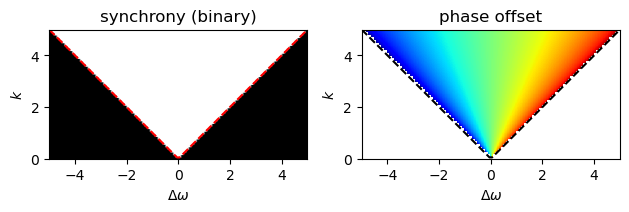

In [3]:
dw = np.linspace(-5,5,100)
k = np.linspace(0.01, 5,100)

DW, K = np.meshgrid(dw,k)
K = np.flip(K,axis=0)

# ---- your code here ---- #
phase_offset = np.arcsin(DW/K)
synch = ~np.isnan(phase_offset)

plt.subplot(1,2,1)
plt.imshow(synch,extent=[-5,5,0,5], cmap='gray')
plt.plot(dw, np.abs(dw),'r--')
plt.xlabel('$\Delta \omega$')
plt.ylabel('$k$')
plt.title('synchrony (binary)')
plt.subplot(1,2,2)
plt.imshow(phase_offset,extent=[-5,5,0,5], cmap='jet')
plt.plot(dw, np.abs(dw),'k--')
plt.xlabel('$\Delta \omega$')
plt.ylabel('$k$')
plt.title('phase offset')
plt.tight_layout()

## Hopfield network 

A Hopfield network is a form of recurrent artificial neural network that serves as content-addressable ("associative") memory system with binary threshold nodes (spins).

### Imprinting memories
Generate $M=5$ patterns where each pattern $\mu$ is a string of $N$ binary numbers $\left\lbrace p_i^{\mu } =\pm 1;1\le i\le N\right\rbrace$ with expected value $\left\langle p_i^{\mu } \right\rangle =0$; i.e., $P(p^{\mu}_i = 1) = P(p^{\mu}_i = -1) = 0.5$. 

In [82]:
N = 100
patterns = np.zeros(shape=(N, 5))
for i in range(5):
    patterns[:,i] = np.random.choice([-1, 1], N, p=[0.5, 0.5])

Store these patterns in a weight matrix $\mathbf{W}$ whose elements are given by

$$
w_{ij}=\frac{1}{N}\sum_{\mu=1}^Mp^{\mu}_ip^{\mu}_j
$$

In [83]:
w = patterns @ patterns.transpose() / N

### Energy & memory recall
Generate a cue for pattern $\mu = 3$ and use it to intialize the network state $S_0$. The cue should be such that the overlap between $S_0$ and $p^{\mu=3}$ is $\sim0.5$.

In [84]:
# ---- your code here ---- #
mu = 2
S0 = copy(patterns[:, mu])
# overlap = 0.5  #-> we can just use random choice because 50:50 chance
rand = np.random.choice((-1.0, 1.0), N, p=[0.25, 0.75])
S0 = S0 * rand
print(np.dot(S0, patterns[:,mu]) / N)

0.42


Let the Hopfield network evolve for $500$ iterations and record both the overlap between $p^{\mu=3}$ and the current state $s$ as well as the energy for each iteration. Use an asynchronous updating scheme: update only a single, randomly selected, unit within each iteration. Update according to

$$
s_i =\mathrm{sgn}\left\lbrack \sum_{j=1}^N w_{\mathrm{ij}} s_j -\theta \right\rbrack
$$

Text(0.5, 0, 'iteration')

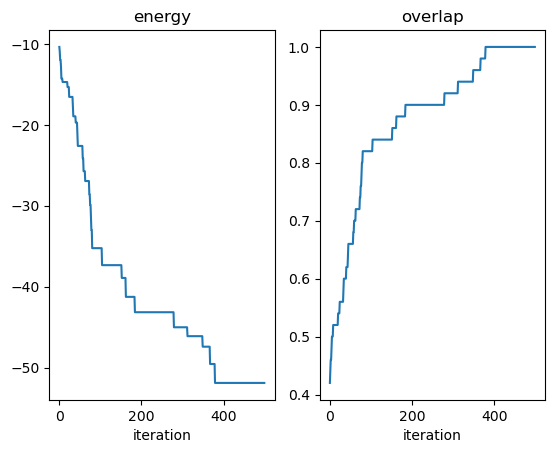

In [88]:
theta = 0  # threshold

iterations = 500
energy = np.zeros(iterations)
overlap = np.zeros(iterations)

S = copy(S0)

for it in range(iterations):
    energy[it] = -1/2 * np.sum(w * np.outer(S, S)) + np.sum(theta*S)
    overlap[it] = np.dot(S, patterns[:, mu]) / N
    i = np.random.randint(N)
    S[i] = np.sign(w[i,:] @ S - theta)


# plotting
plt.figure()
plt.subplot(1,2,1)
plt.plot(energy)
plt.title('energy')
plt.xlabel('iteration')

plt.subplot(1,2,2)
plt.plot(overlap)
plt.title('overlap')
plt.xlabel('iteration')

**Question**: What happens with energy and overlap as you change the threshold? How does this depend on pattern 3?

It influences the balance between low values in the nodes and overlap. The higher the threshold, the lower the overlap. This depends on the pattern because the amount of positive numbers in the patterns influences the energy.